# Naive Bayes Classifier

## Importing dataset

In [1]:
from os import listdir
from os.path import join
from pathlib import Path

class Message:
    def __init__(self, text: str, legit: bool):
        def split_ints(text: str):
            return list(map(int, filter(lambda x: len(x) > 0, text.split(" "))))

        lines = text.split("\n")
        self.subject = split_ints(lines[0][len("Subject: "):])
        self.text = split_ints(lines[2])
        self.legit = legit

dataset_directory = 'dataset'
subdirectories = sorted(listdir(dataset_directory), key=lambda x: int(x[4:]))
data = [[Message(Path(join(dataset_directory, x, y)).read_text(), "legit" in y) for y in listdir(join(dataset_directory, x))] for x in subdirectories]


## solution

In [2]:
from math import log, exp
from sklearn.metrics import f1_score
from NaiveBayesClassifier import naive_bayes_classifier

def nbc(l_spam: int, l_legit: int, alpha: float, learning: list, testing: list):
    result = naive_bayes_classifier(
        2,
        [l_spam, l_legit],
        alpha,
        [(legit + 1, [str(word).replace(" ", "") for word in text]) for legit, text in learning],
        [[str(word).replace(" ", "") for word in text] for text in testing]
    )
    return [x[1] >= x[0] for x in result]

def test(data: list, n: int, l_spam: int, l_legit: int, alpha: float):
    expected = []
    predicted = []

    for i in range(len(data)):
        n_grammed_learning_data = n_grammed(sum(data[:i] + data[i+1:], []), n)
        n_grammed_test_data = n_grammed(data[i], n)

        expected += [x.legit for x in data[i]]
        predicted += nbc(l_spam, l_legit, alpha, n_grammed_learning_data, [x[1] for x in n_grammed_test_data])

    return (expected, predicted)

def n_grammed(messages: list, n: int):
    def n_gram(message: Message, n: int):
        def n_gram(int_list: list):
            return [int_list[i:i+n] for i in range(len(int_list) - n + 1)]

        subject, text = list(map(n_gram, [message.subject, message.text]))
        return [[-j for j in i] for i in subject] + text

    return [(int(x.legit), n_gram(x, n)) for x in messages]

In [3]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

def roc_plot(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def dependency_plot(xlabel, ylabel, results):
    plt.plot([x[0] for x in results], [x[1] for x in results])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [7]:
from sklearn.metrics import f1_score

l_spam = 1
l_legit = 10

for n in [1, 2, 3]:
    for alpha in [1e-10, 1e-5, 1e-2, 0.1, 0.5, 1.0, 1.5]:
        score = f1_score(*test(data, n, l_spam, l_legit, alpha), average='weighted')
        print(f'n = {n}, alpha = {alpha}, score = {score}')

n = 1, alpha = 1e-10, score = 0.9779313537583073
n = 1, alpha = 1e-05, score = 0.9714737032389559
n = 1, alpha = 0.01, score = 0.9640898207617217
n = 1, alpha = 0.1, score = 0.9538759616220918
n = 1, alpha = 0.5, score = 0.9351723532858677
n = 1, alpha = 1.0, score = 0.914312801697769
n = 1, alpha = 1.5, score = 0.8873373395712703
n = 2, alpha = 1e-10, score = 0.9788597581934134
n = 2, alpha = 1e-05, score = 0.9622111291440965
n = 2, alpha = 0.01, score = 0.9275677645315875
n = 2, alpha = 0.1, score = 0.8969771640454092
n = 2, alpha = 0.5, score = 0.8270422198205606
n = 2, alpha = 1.0, score = 0.756385349061516
n = 2, alpha = 1.5, score = 0.7230469540455473
n = 3, alpha = 1e-10, score = 0.9576376500151947
n = 3, alpha = 1e-05, score = 0.9248690801377731
n = 3, alpha = 0.01, score = 0.8775552121437373
n = 3, alpha = 0.1, score = 0.8291128379377556
n = 3, alpha = 0.5, score = 0.7177862332125079
n = 3, alpha = 1.0, score = 0.6478737601727604
n = 3, alpha = 1.5, score = 0.589992448946069


ROC curve for best params and accuracy 0.978

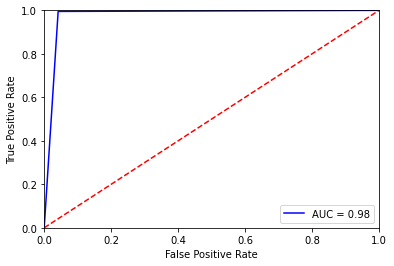

In [41]:
n = 1
alpha = 1e-10
l_spam = 1
l_legit = 1

roc_plot(*test(data, n, l_spam, l_legit, alpha))

Found l_legit with no legit messages classified as spam is 10^70 (and accuracy 0.8791)

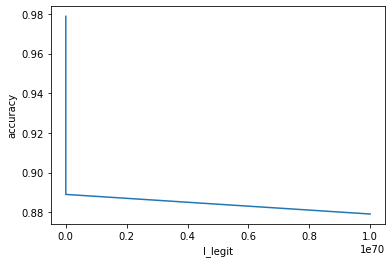

In [8]:
n = 1
alpha = 1e-10
l_spam = 1

results = [(l_legit, f1_score(*test(data, n, l_spam, l_legit, alpha), average='weighted')) for l_legit in [10 ** x for x in range(0, 71, 5)]]
dependency_plot('l_legit', 'accuracy', results)

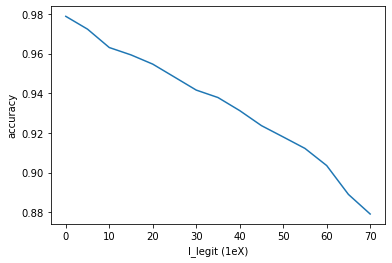

In [9]:
n = 1
alpha = 1e-10
l_spam = 1

results = [(x, f1_score(*test(data, n, l_spam, 10 ** x, alpha), average='weighted')) for x in range(0, 71, 5)]
dependency_plot('l_legit (1eX)', 'accuracy', results)